# Conditional Generative Adversarial Nets
Paper: https://arxiv.org/pdf/1411.1784.pdf

In [1]:
!pip install array2gif

In [14]:
LATENT_SIZE = 100
EPOCH_SIZE  = 200
ROW_NUM     = 10
NUM_CLASSES = 10

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def plot_epoch(images, n=100):
    '''  
    Visualize a single epoch of images
    Parameters
    ----------
    images : images of shape (b, c, x, y)
    n      : int, default: 100
             number of images to display. Must be a square number
    ''' 
    
    if not isinstance(images, np.ndarray):
        images = images.detach().numpy()

    rowcols = np.sqrt(n) 
    plt.figure(figsize=(rowcols, rowcols))
    for index in range(n):
        plt.subplot(rowcols, rowcols, index + 1)
        plt.imshow(images[index, 0, :, :], cmap="binary")
        plt.axis("off")
    plt.show()

In [16]:
import torch
import torch.nn as nn

class Generator(nn.Module):
  def __init__(self, latent_size = 100, n_class = NUM_CLASSES):
    super(Generator, self).__init__()
    self.label = nn.Embedding(n_class,10)
    self.layers = nn.Sequential(nn.Linear(latent_size + 10, 512),
                                nn.Dropout(),
                                nn.BatchNorm1d(512, 0.8),
                                nn.LeakyReLU(0.2, inplace=True),
                                nn.Linear(512, 1024),
                                nn.BatchNorm1d(1024, 0.8),
                                nn.LeakyReLU(0.2, inplace=True),
                                nn.Linear(1024,2048),
                                nn.BatchNorm1d(2048, 0.8),
                                nn.LeakyReLU(0.2, inplace=True),
                                nn.Linear(2048,784),
                                nn.Tanh()
                                )       
  def forward(self, latent, labels):
    inp = torch.cat((self.label(labels), latent), 1)
    out = self.layers(inp);
    out = out.view((out.size(0),1,28,28))
    return out

  def __call__(self, latent, labels):
    return self.forward(latent, labels)



class Discriminator(nn.Module):
  def __init__(self, n_class = NUM_CLASSES):
    super(Discriminator, self).__init__()
    self.label = nn.Embedding(n_class, 10)
    self.layers = nn.Sequential(nn.Linear(784 + 10, 1024),                    
                                nn.LeakyReLU(0.2, inplace=True),
                                nn.Linear(1024,512),
                                nn.LeakyReLU(0.2, inplace=True),
                                nn.Linear(512,256),
                                nn.LeakyReLU(0.2, inplace=True),
                                nn.Linear(256, 1),
                                nn.Sigmoid()
                                )
    
  def forward(self, image, labels):
      inp = torch.cat((image.view(image.size(0), -1), self.label(labels)), 1)
      decision = self.layers(inp)
      return decision

  def __call__(self, image, labels):
      return self.forward(image, labels)

Device is: cuda
Epoch [0/200], Step [200/468], d_loss: 0.8954, g_loss: 0.9936, D(x): 0.36, D(G(z)): 0.53
Epoch [0/200], Step [400/468], d_loss: 1.0075, g_loss: 1.0704, D(x): 0.49, D(G(z)): 0.52


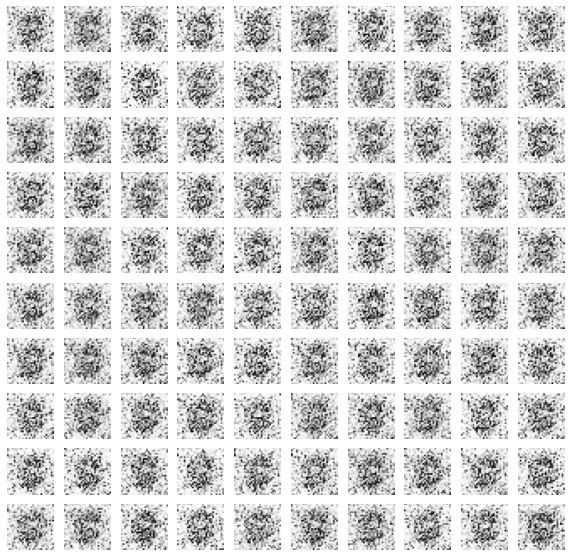

Epoch [1/200], Step [200/468], d_loss: 1.3803, g_loss: 0.7394, D(x): 0.62, D(G(z)): 0.76
Epoch [1/200], Step [400/468], d_loss: 1.2669, g_loss: 0.8006, D(x): 0.58, D(G(z)): 0.68
Epoch [2/200], Step [200/468], d_loss: 1.3200, g_loss: 0.8075, D(x): 0.62, D(G(z)): 0.70
Epoch [2/200], Step [400/468], d_loss: 1.1266, g_loss: 1.0193, D(x): 0.53, D(G(z)): 0.59
Epoch [3/200], Step [200/468], d_loss: 1.1588, g_loss: 0.9593, D(x): 0.56, D(G(z)): 0.60
Epoch [3/200], Step [400/468], d_loss: 1.1477, g_loss: 1.0047, D(x): 0.58, D(G(z)): 0.57
Epoch [4/200], Step [200/468], d_loss: 1.2361, g_loss: 0.9440, D(x): 0.62, D(G(z)): 0.61
Epoch [4/200], Step [400/468], d_loss: 1.2369, g_loss: 0.9202, D(x): 0.60, D(G(z)): 0.63
Epoch [5/200], Step [200/468], d_loss: 1.1417, g_loss: 0.9549, D(x): 0.54, D(G(z)): 0.60
Epoch [5/200], Step [400/468], d_loss: 1.1668, g_loss: 0.9127, D(x): 0.54, D(G(z)): 0.63


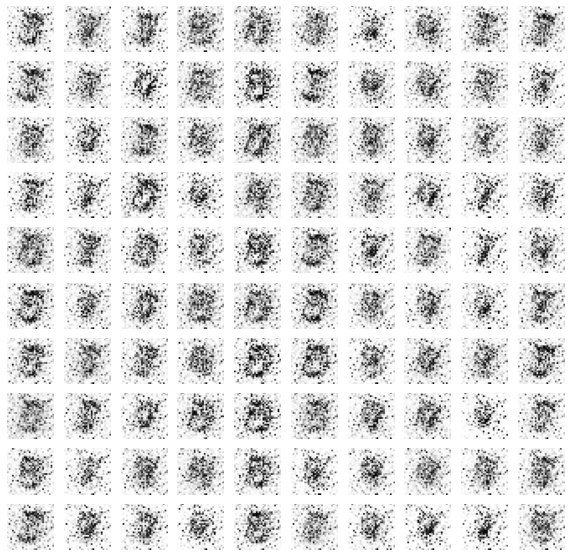

Epoch [6/200], Step [200/468], d_loss: 1.1776, g_loss: 0.9016, D(x): 0.55, D(G(z)): 0.62
Epoch [6/200], Step [400/468], d_loss: 1.2925, g_loss: 0.8662, D(x): 0.64, D(G(z)): 0.65
Epoch [7/200], Step [200/468], d_loss: 1.2561, g_loss: 0.8855, D(x): 0.61, D(G(z)): 0.64
Epoch [7/200], Step [400/468], d_loss: 1.1148, g_loss: 0.9894, D(x): 0.55, D(G(z)): 0.56
Epoch [8/200], Step [200/468], d_loss: 1.1380, g_loss: 0.9415, D(x): 0.52, D(G(z)): 0.62
Epoch [8/200], Step [400/468], d_loss: 1.1395, g_loss: 0.9575, D(x): 0.55, D(G(z)): 0.59
Epoch [9/200], Step [200/468], d_loss: 1.1122, g_loss: 1.0009, D(x): 0.55, D(G(z)): 0.56
Epoch [9/200], Step [400/468], d_loss: 1.1983, g_loss: 0.8901, D(x): 0.58, D(G(z)): 0.62
Epoch [10/200], Step [200/468], d_loss: 1.1906, g_loss: 0.8885, D(x): 0.55, D(G(z)): 0.64
Epoch [10/200], Step [400/468], d_loss: 1.0862, g_loss: 0.9966, D(x): 0.50, D(G(z)): 0.59


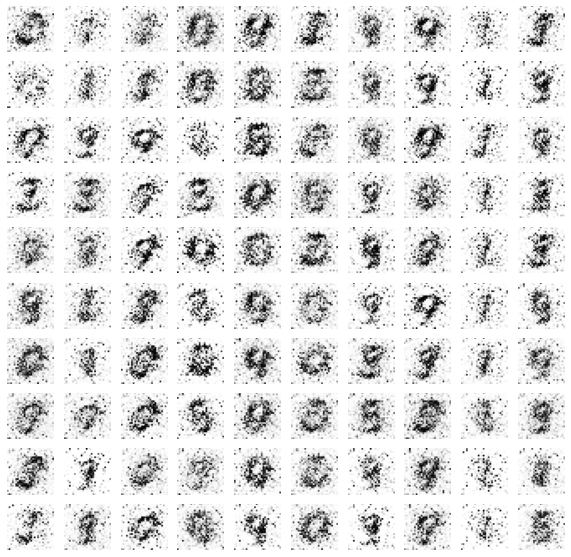

Epoch [11/200], Step [200/468], d_loss: 1.1554, g_loss: 1.0340, D(x): 0.60, D(G(z)): 0.55
Epoch [11/200], Step [400/468], d_loss: 1.2285, g_loss: 0.9285, D(x): 0.61, D(G(z)): 0.62
Epoch [12/200], Step [200/468], d_loss: 1.1726, g_loss: 0.9833, D(x): 0.58, D(G(z)): 0.59
Epoch [12/200], Step [400/468], d_loss: 1.1180, g_loss: 0.9493, D(x): 0.51, D(G(z)): 0.61
Epoch [13/200], Step [200/468], d_loss: 1.1578, g_loss: 1.0048, D(x): 0.57, D(G(z)): 0.59
Epoch [13/200], Step [400/468], d_loss: 1.1080, g_loss: 0.9906, D(x): 0.53, D(G(z)): 0.58
Epoch [14/200], Step [200/468], d_loss: 1.1151, g_loss: 0.9914, D(x): 0.53, D(G(z)): 0.58
Epoch [14/200], Step [400/468], d_loss: 1.2683, g_loss: 0.9686, D(x): 0.63, D(G(z)): 0.64
Epoch [15/200], Step [200/468], d_loss: 1.2239, g_loss: 0.8865, D(x): 0.58, D(G(z)): 0.65
Epoch [15/200], Step [400/468], d_loss: 1.2267, g_loss: 0.9368, D(x): 0.64, D(G(z)): 0.59


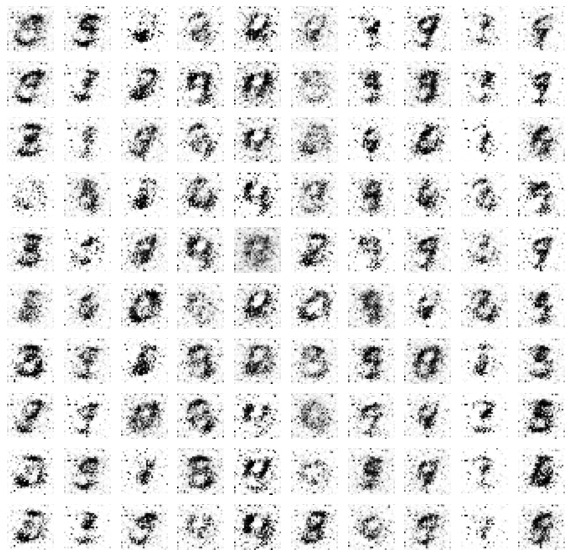

Epoch [16/200], Step [200/468], d_loss: 1.2238, g_loss: 0.8707, D(x): 0.55, D(G(z)): 0.67
Epoch [16/200], Step [400/468], d_loss: 1.1335, g_loss: 1.0461, D(x): 0.56, D(G(z)): 0.57
Epoch [17/200], Step [200/468], d_loss: 1.0710, g_loss: 0.9689, D(x): 0.50, D(G(z)): 0.57
Epoch [17/200], Step [400/468], d_loss: 1.0396, g_loss: 1.0967, D(x): 0.50, D(G(z)): 0.54
Epoch [18/200], Step [200/468], d_loss: 1.0965, g_loss: 0.9792, D(x): 0.54, D(G(z)): 0.56
Epoch [18/200], Step [400/468], d_loss: 1.1170, g_loss: 1.0319, D(x): 0.53, D(G(z)): 0.58
Epoch [19/200], Step [200/468], d_loss: 1.1830, g_loss: 1.0210, D(x): 0.57, D(G(z)): 0.61
Epoch [19/200], Step [400/468], d_loss: 1.1469, g_loss: 0.9835, D(x): 0.52, D(G(z)): 0.63
Epoch [20/200], Step [200/468], d_loss: 1.1182, g_loss: 0.9682, D(x): 0.51, D(G(z)): 0.61
Epoch [20/200], Step [400/468], d_loss: 1.2592, g_loss: 0.9804, D(x): 0.63, D(G(z)): 0.63


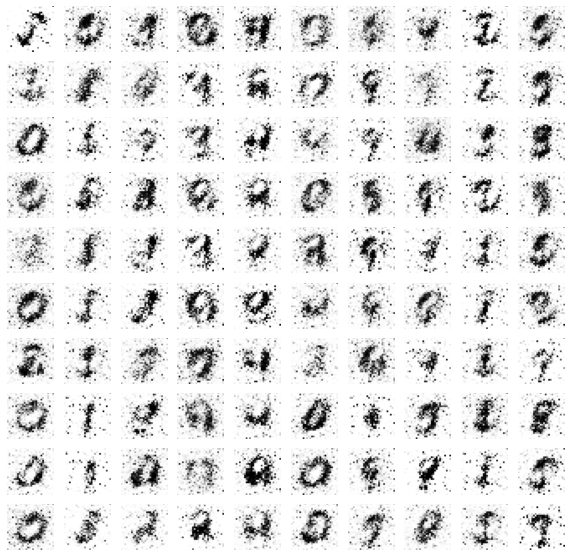

Epoch [21/200], Step [200/468], d_loss: 1.1255, g_loss: 0.9615, D(x): 0.52, D(G(z)): 0.61
Epoch [21/200], Step [400/468], d_loss: 1.1843, g_loss: 0.9853, D(x): 0.59, D(G(z)): 0.60
Epoch [22/200], Step [200/468], d_loss: 1.2219, g_loss: 0.9592, D(x): 0.58, D(G(z)): 0.65
Epoch [22/200], Step [400/468], d_loss: 1.1806, g_loss: 0.9449, D(x): 0.57, D(G(z)): 0.61
Epoch [23/200], Step [200/468], d_loss: 1.2020, g_loss: 0.9936, D(x): 0.60, D(G(z)): 0.60
Epoch [23/200], Step [400/468], d_loss: 1.2536, g_loss: 0.9305, D(x): 0.61, D(G(z)): 0.64
Epoch [24/200], Step [200/468], d_loss: 1.1713, g_loss: 1.1924, D(x): 0.65, D(G(z)): 0.52
Epoch [24/200], Step [400/468], d_loss: 1.2157, g_loss: 0.8820, D(x): 0.52, D(G(z)): 0.69
Epoch [25/200], Step [200/468], d_loss: 1.1241, g_loss: 1.0103, D(x): 0.54, D(G(z)): 0.58
Epoch [25/200], Step [400/468], d_loss: 1.0197, g_loss: 1.1171, D(x): 0.54, D(G(z)): 0.48


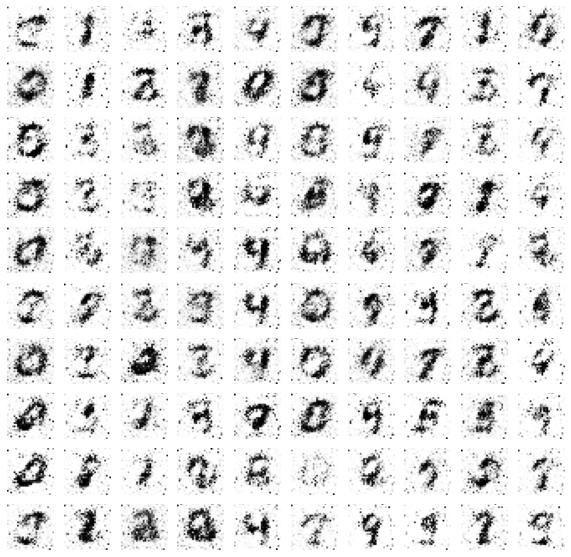

Epoch [26/200], Step [200/468], d_loss: 1.0325, g_loss: 1.1756, D(x): 0.53, D(G(z)): 0.50
Epoch [26/200], Step [400/468], d_loss: 1.2606, g_loss: 0.9948, D(x): 0.64, D(G(z)): 0.62
Epoch [27/200], Step [200/468], d_loss: 1.3216, g_loss: 0.8990, D(x): 0.64, D(G(z)): 0.68
Epoch [27/200], Step [400/468], d_loss: 1.1194, g_loss: 0.9855, D(x): 0.55, D(G(z)): 0.57
Epoch [28/200], Step [200/468], d_loss: 1.3501, g_loss: 0.7983, D(x): 0.59, D(G(z)): 0.76
Epoch [28/200], Step [400/468], d_loss: 1.1704, g_loss: 0.9233, D(x): 0.53, D(G(z)): 0.64
Epoch [29/200], Step [200/468], d_loss: 1.3072, g_loss: 0.9299, D(x): 0.64, D(G(z)): 0.67
Epoch [29/200], Step [400/468], d_loss: 1.1481, g_loss: 1.0071, D(x): 0.60, D(G(z)): 0.55
Epoch [30/200], Step [200/468], d_loss: 1.2334, g_loss: 1.0261, D(x): 0.63, D(G(z)): 0.61
Epoch [30/200], Step [400/468], d_loss: 1.1534, g_loss: 1.0053, D(x): 0.60, D(G(z)): 0.56


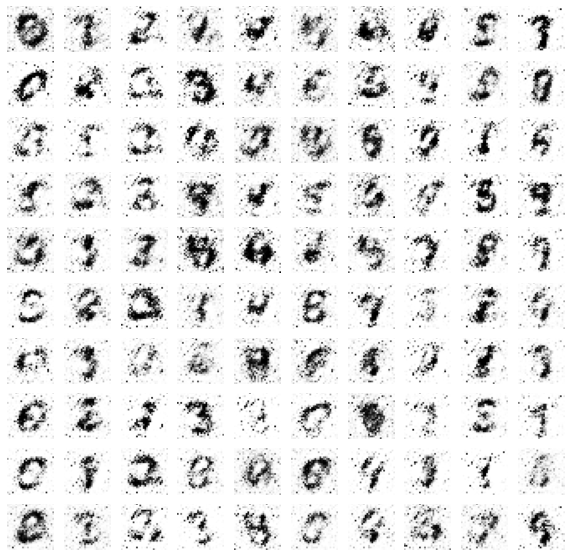

Epoch [31/200], Step [200/468], d_loss: 1.0906, g_loss: 0.9706, D(x): 0.51, D(G(z)): 0.58
Epoch [31/200], Step [400/468], d_loss: 1.1059, g_loss: 1.0816, D(x): 0.55, D(G(z)): 0.55
Epoch [32/200], Step [200/468], d_loss: 1.2066, g_loss: 1.0737, D(x): 0.62, D(G(z)): 0.59
Epoch [32/200], Step [400/468], d_loss: 1.2071, g_loss: 0.9824, D(x): 0.60, D(G(z)): 0.61
Epoch [33/200], Step [200/468], d_loss: 1.1478, g_loss: 0.9908, D(x): 0.56, D(G(z)): 0.58
Epoch [33/200], Step [400/468], d_loss: 1.2120, g_loss: 1.0118, D(x): 0.61, D(G(z)): 0.61
Epoch [34/200], Step [200/468], d_loss: 1.1915, g_loss: 0.9982, D(x): 0.58, D(G(z)): 0.61
Epoch [34/200], Step [400/468], d_loss: 1.2366, g_loss: 0.8468, D(x): 0.55, D(G(z)): 0.68
Epoch [35/200], Step [200/468], d_loss: 1.0628, g_loss: 1.0446, D(x): 0.49, D(G(z)): 0.57
Epoch [35/200], Step [400/468], d_loss: 1.2430, g_loss: 0.9771, D(x): 0.59, D(G(z)): 0.65


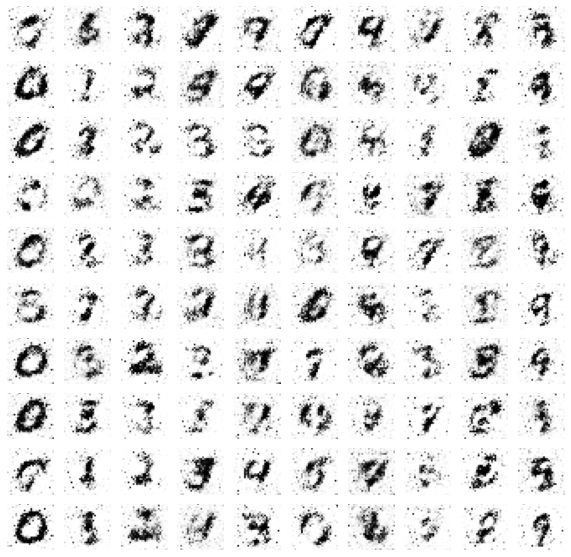

Epoch [36/200], Step [200/468], d_loss: 1.1596, g_loss: 1.0169, D(x): 0.57, D(G(z)): 0.58
Epoch [36/200], Step [400/468], d_loss: 1.0780, g_loss: 1.0298, D(x): 0.53, D(G(z)): 0.55
Epoch [37/200], Step [200/468], d_loss: 1.2095, g_loss: 0.9375, D(x): 0.58, D(G(z)): 0.63
Epoch [37/200], Step [400/468], d_loss: 1.1850, g_loss: 0.9969, D(x): 0.60, D(G(z)): 0.59
Epoch [38/200], Step [200/468], d_loss: 1.1387, g_loss: 1.0954, D(x): 0.65, D(G(z)): 0.49
Epoch [38/200], Step [400/468], d_loss: 1.4088, g_loss: 0.9654, D(x): 0.76, D(G(z)): 0.65
Epoch [39/200], Step [200/468], d_loss: 1.0755, g_loss: 1.0777, D(x): 0.53, D(G(z)): 0.55
Epoch [39/200], Step [400/468], d_loss: 1.1903, g_loss: 0.9546, D(x): 0.56, D(G(z)): 0.63
Epoch [40/200], Step [200/468], d_loss: 1.2495, g_loss: 1.0126, D(x): 0.67, D(G(z)): 0.58
Epoch [40/200], Step [400/468], d_loss: 1.1730, g_loss: 0.9846, D(x): 0.58, D(G(z)): 0.59


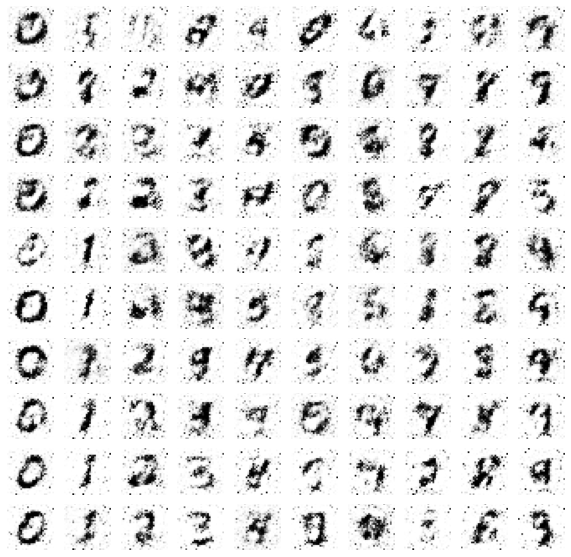

Epoch [41/200], Step [200/468], d_loss: 1.1816, g_loss: 1.0602, D(x): 0.62, D(G(z)): 0.56
Epoch [41/200], Step [400/468], d_loss: 1.1076, g_loss: 1.0226, D(x): 0.50, D(G(z)): 0.61
Epoch [42/200], Step [200/468], d_loss: 1.0945, g_loss: 1.0185, D(x): 0.53, D(G(z)): 0.56
Epoch [42/200], Step [400/468], d_loss: 1.1700, g_loss: 1.0005, D(x): 0.60, D(G(z)): 0.57
Epoch [43/200], Step [200/468], d_loss: 1.2060, g_loss: 0.9757, D(x): 0.60, D(G(z)): 0.60
Epoch [43/200], Step [400/468], d_loss: 1.0935, g_loss: 1.1300, D(x): 0.57, D(G(z)): 0.52
Epoch [44/200], Step [200/468], d_loss: 1.2458, g_loss: 1.0289, D(x): 0.67, D(G(z)): 0.57
Epoch [44/200], Step [400/468], d_loss: 1.1762, g_loss: 1.0134, D(x): 0.59, D(G(z)): 0.59
Epoch [45/200], Step [200/468], d_loss: 1.1593, g_loss: 1.0845, D(x): 0.60, D(G(z)): 0.56
Epoch [45/200], Step [400/468], d_loss: 1.2372, g_loss: 0.9957, D(x): 0.61, D(G(z)): 0.63


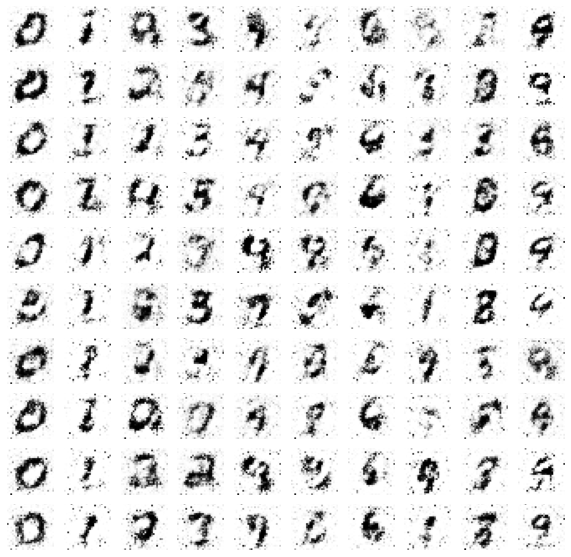

Epoch [46/200], Step [200/468], d_loss: 1.2714, g_loss: 0.8563, D(x): 0.56, D(G(z)): 0.71
Epoch [46/200], Step [400/468], d_loss: 1.2158, g_loss: 0.9082, D(x): 0.54, D(G(z)): 0.68
Epoch [47/200], Step [200/468], d_loss: 1.0473, g_loss: 1.0589, D(x): 0.56, D(G(z)): 0.49
Epoch [47/200], Step [400/468], d_loss: 1.1238, g_loss: 0.9935, D(x): 0.54, D(G(z)): 0.58
Epoch [48/200], Step [200/468], d_loss: 1.1894, g_loss: 0.9589, D(x): 0.58, D(G(z)): 0.60
Epoch [48/200], Step [400/468], d_loss: 1.1458, g_loss: 1.0685, D(x): 0.61, D(G(z)): 0.53
Epoch [49/200], Step [200/468], d_loss: 1.2587, g_loss: 0.9239, D(x): 0.58, D(G(z)): 0.68
Epoch [49/200], Step [400/468], d_loss: 1.1818, g_loss: 0.9410, D(x): 0.52, D(G(z)): 0.66
Epoch [50/200], Step [200/468], d_loss: 1.0779, g_loss: 1.0263, D(x): 0.52, D(G(z)): 0.56
Epoch [50/200], Step [400/468], d_loss: 1.1448, g_loss: 1.0146, D(x): 0.57, D(G(z)): 0.58


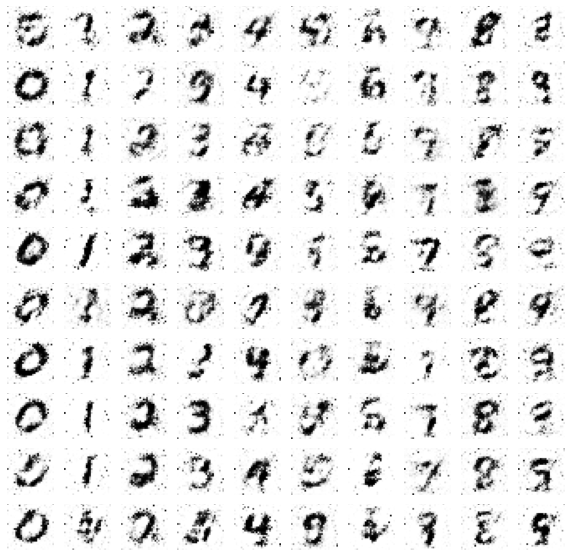

Epoch [51/200], Step [200/468], d_loss: 1.1010, g_loss: 0.9886, D(x): 0.52, D(G(z)): 0.58
Epoch [51/200], Step [400/468], d_loss: 1.1248, g_loss: 1.0615, D(x): 0.57, D(G(z)): 0.56
Epoch [52/200], Step [200/468], d_loss: 1.1555, g_loss: 1.0549, D(x): 0.62, D(G(z)): 0.54
Epoch [52/200], Step [400/468], d_loss: 1.1517, g_loss: 1.0598, D(x): 0.59, D(G(z)): 0.56
Epoch [53/200], Step [200/468], d_loss: 1.1351, g_loss: 1.0907, D(x): 0.59, D(G(z)): 0.55
Epoch [53/200], Step [400/468], d_loss: 1.1504, g_loss: 1.0667, D(x): 0.63, D(G(z)): 0.52
Epoch [54/200], Step [200/468], d_loss: 1.1986, g_loss: 0.9028, D(x): 0.59, D(G(z)): 0.61
Epoch [54/200], Step [400/468], d_loss: 1.1071, g_loss: 1.0216, D(x): 0.56, D(G(z)): 0.54
Epoch [55/200], Step [200/468], d_loss: 1.0687, g_loss: 1.0735, D(x): 0.52, D(G(z)): 0.55
Epoch [55/200], Step [400/468], d_loss: 1.1368, g_loss: 1.0530, D(x): 0.60, D(G(z)): 0.54


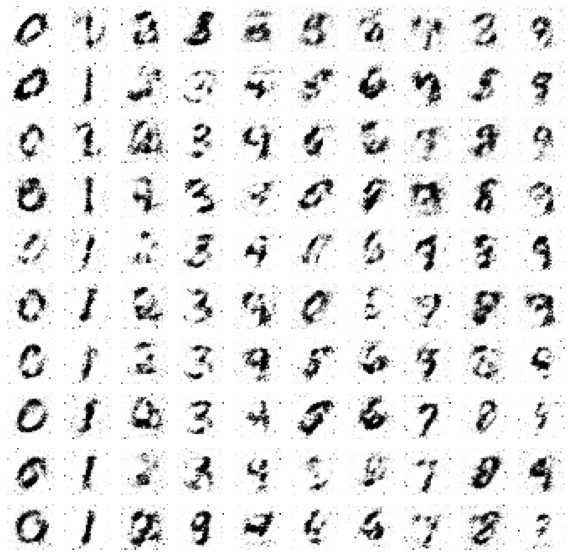

Epoch [56/200], Step [200/468], d_loss: 1.0268, g_loss: 1.1268, D(x): 0.51, D(G(z)): 0.52
Epoch [56/200], Step [400/468], d_loss: 1.1115, g_loss: 1.1021, D(x): 0.61, D(G(z)): 0.51
Epoch [57/200], Step [200/468], d_loss: 1.1293, g_loss: 0.9679, D(x): 0.55, D(G(z)): 0.58
Epoch [57/200], Step [400/468], d_loss: 1.0976, g_loss: 1.1338, D(x): 0.60, D(G(z)): 0.50
Epoch [58/200], Step [200/468], d_loss: 1.0915, g_loss: 1.0800, D(x): 0.57, D(G(z)): 0.52
Epoch [58/200], Step [400/468], d_loss: 1.0025, g_loss: 1.1047, D(x): 0.49, D(G(z)): 0.51
Epoch [59/200], Step [200/468], d_loss: 1.0461, g_loss: 1.1411, D(x): 0.55, D(G(z)): 0.49
Epoch [59/200], Step [400/468], d_loss: 1.0438, g_loss: 1.0770, D(x): 0.52, D(G(z)): 0.53
Epoch [60/200], Step [200/468], d_loss: 1.0839, g_loss: 1.0354, D(x): 0.52, D(G(z)): 0.57
Epoch [60/200], Step [400/468], d_loss: 1.0735, g_loss: 1.1278, D(x): 0.50, D(G(z)): 0.57


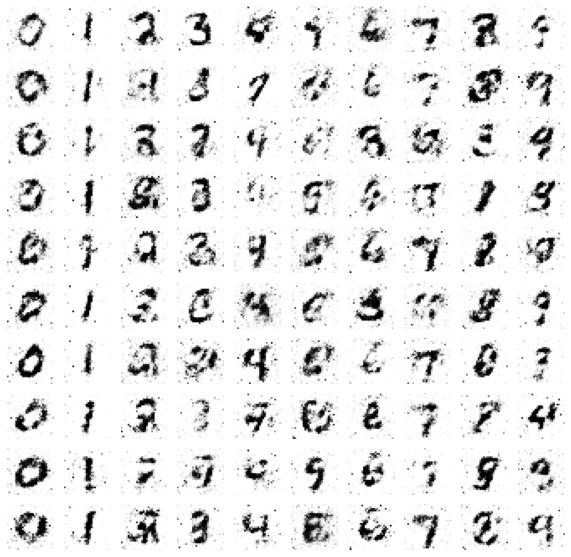

Epoch [61/200], Step [200/468], d_loss: 1.2125, g_loss: 1.2300, D(x): 0.71, D(G(z)): 0.50
Epoch [61/200], Step [400/468], d_loss: 1.0546, g_loss: 1.0701, D(x): 0.54, D(G(z)): 0.51
Epoch [62/200], Step [200/468], d_loss: 0.9800, g_loss: 1.2186, D(x): 0.49, D(G(z)): 0.49
Epoch [62/200], Step [400/468], d_loss: 1.0995, g_loss: 1.1128, D(x): 0.58, D(G(z)): 0.51
Epoch [63/200], Step [200/468], d_loss: 1.1782, g_loss: 1.0729, D(x): 0.58, D(G(z)): 0.60
Epoch [63/200], Step [400/468], d_loss: 1.0854, g_loss: 1.0466, D(x): 0.54, D(G(z)): 0.54
Epoch [64/200], Step [200/468], d_loss: 1.0383, g_loss: 1.1163, D(x): 0.51, D(G(z)): 0.53
Epoch [64/200], Step [400/468], d_loss: 1.1482, g_loss: 1.1321, D(x): 0.63, D(G(z)): 0.51
Epoch [65/200], Step [200/468], d_loss: 1.0499, g_loss: 1.1267, D(x): 0.56, D(G(z)): 0.49
Epoch [65/200], Step [400/468], d_loss: 1.0754, g_loss: 1.0910, D(x): 0.52, D(G(z)): 0.55


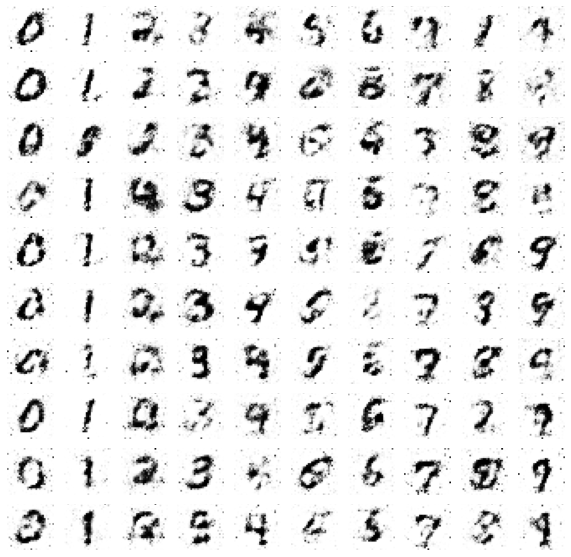

Epoch [66/200], Step [200/468], d_loss: 1.0877, g_loss: 1.1168, D(x): 0.56, D(G(z)): 0.52
Epoch [66/200], Step [400/468], d_loss: 1.0561, g_loss: 1.0744, D(x): 0.53, D(G(z)): 0.53
Epoch [67/200], Step [200/468], d_loss: 1.0693, g_loss: 1.0854, D(x): 0.54, D(G(z)): 0.53
Epoch [67/200], Step [400/468], d_loss: 0.9683, g_loss: 1.2022, D(x): 0.52, D(G(z)): 0.44
Epoch [68/200], Step [200/468], d_loss: 1.0005, g_loss: 1.1419, D(x): 0.52, D(G(z)): 0.48
Epoch [68/200], Step [400/468], d_loss: 1.0454, g_loss: 1.1401, D(x): 0.55, D(G(z)): 0.50
Epoch [69/200], Step [200/468], d_loss: 1.0264, g_loss: 1.1831, D(x): 0.53, D(G(z)): 0.49
Epoch [69/200], Step [400/468], d_loss: 0.9712, g_loss: 1.2326, D(x): 0.50, D(G(z)): 0.47
Epoch [70/200], Step [200/468], d_loss: 1.0780, g_loss: 1.1809, D(x): 0.57, D(G(z)): 0.50
Epoch [70/200], Step [400/468], d_loss: 1.0474, g_loss: 1.2679, D(x): 0.58, D(G(z)): 0.47


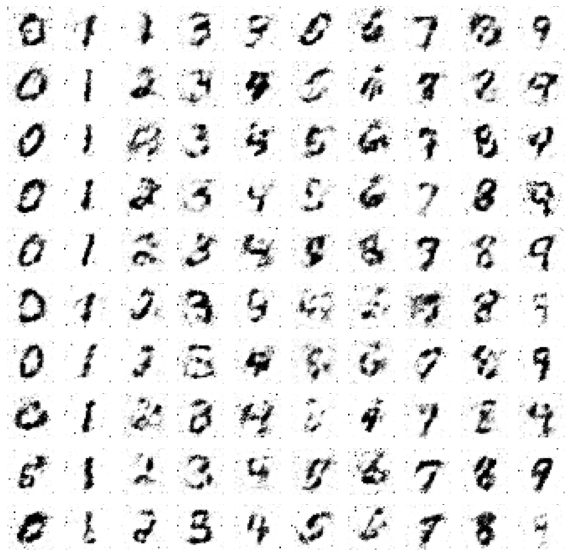

Epoch [71/200], Step [200/468], d_loss: 0.9299, g_loss: 1.3101, D(x): 0.49, D(G(z)): 0.44
Epoch [71/200], Step [400/468], d_loss: 1.0250, g_loss: 0.9946, D(x): 0.47, D(G(z)): 0.56
Epoch [72/200], Step [200/468], d_loss: 1.0660, g_loss: 1.2388, D(x): 0.59, D(G(z)): 0.48
Epoch [72/200], Step [400/468], d_loss: 0.9234, g_loss: 1.2098, D(x): 0.47, D(G(z)): 0.45
Epoch [73/200], Step [200/468], d_loss: 0.9663, g_loss: 1.3234, D(x): 0.54, D(G(z)): 0.43
Epoch [73/200], Step [400/468], d_loss: 0.9827, g_loss: 1.1570, D(x): 0.49, D(G(z)): 0.49
Epoch [74/200], Step [200/468], d_loss: 1.0472, g_loss: 1.2004, D(x): 0.58, D(G(z)): 0.47
Epoch [74/200], Step [400/468], d_loss: 1.0386, g_loss: 1.1407, D(x): 0.48, D(G(z)): 0.56
Epoch [75/200], Step [200/468], d_loss: 1.0761, g_loss: 1.2516, D(x): 0.59, D(G(z)): 0.49
Epoch [75/200], Step [400/468], d_loss: 0.9817, g_loss: 1.2566, D(x): 0.50, D(G(z)): 0.48


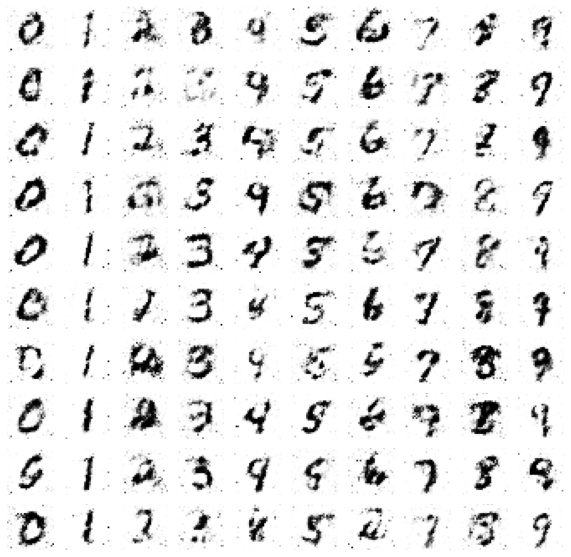

Epoch [76/200], Step [200/468], d_loss: 0.9474, g_loss: 1.1685, D(x): 0.44, D(G(z)): 0.51
Epoch [76/200], Step [400/468], d_loss: 0.9737, g_loss: 1.1500, D(x): 0.49, D(G(z)): 0.48
Epoch [77/200], Step [200/468], d_loss: 1.0144, g_loss: 1.2737, D(x): 0.58, D(G(z)): 0.43
Epoch [77/200], Step [400/468], d_loss: 1.0232, g_loss: 1.1852, D(x): 0.57, D(G(z)): 0.46
Epoch [78/200], Step [200/468], d_loss: 0.9793, g_loss: 1.2738, D(x): 0.49, D(G(z)): 0.49
Epoch [78/200], Step [400/468], d_loss: 0.8615, g_loss: 1.1650, D(x): 0.39, D(G(z)): 0.47
Epoch [79/200], Step [200/468], d_loss: 0.9374, g_loss: 1.1746, D(x): 0.45, D(G(z)): 0.49
Epoch [79/200], Step [400/468], d_loss: 0.9915, g_loss: 1.2133, D(x): 0.53, D(G(z)): 0.46
Epoch [80/200], Step [200/468], d_loss: 0.9995, g_loss: 1.2212, D(x): 0.55, D(G(z)): 0.45
Epoch [80/200], Step [400/468], d_loss: 1.0091, g_loss: 1.1771, D(x): 0.54, D(G(z)): 0.47


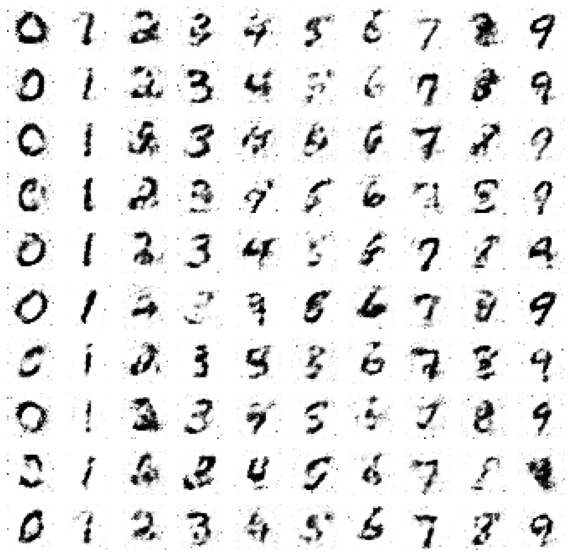

Epoch [81/200], Step [200/468], d_loss: 0.9656, g_loss: 1.1459, D(x): 0.46, D(G(z)): 0.51
Epoch [81/200], Step [400/468], d_loss: 0.9610, g_loss: 1.2641, D(x): 0.51, D(G(z)): 0.46
Epoch [82/200], Step [200/468], d_loss: 0.9208, g_loss: 1.1659, D(x): 0.41, D(G(z)): 0.51
Epoch [82/200], Step [400/468], d_loss: 1.1002, g_loss: 1.1466, D(x): 0.52, D(G(z)): 0.58
Epoch [83/200], Step [200/468], d_loss: 1.0039, g_loss: 1.1219, D(x): 0.50, D(G(z)): 0.50
Epoch [83/200], Step [400/468], d_loss: 0.9339, g_loss: 1.2056, D(x): 0.46, D(G(z)): 0.47
Epoch [84/200], Step [200/468], d_loss: 0.9133, g_loss: 1.3515, D(x): 0.49, D(G(z)): 0.42
Epoch [84/200], Step [400/468], d_loss: 1.0557, g_loss: 1.1746, D(x): 0.53, D(G(z)): 0.52
Epoch [85/200], Step [200/468], d_loss: 0.9345, g_loss: 1.1507, D(x): 0.47, D(G(z)): 0.46
Epoch [85/200], Step [400/468], d_loss: 0.9244, g_loss: 1.1307, D(x): 0.41, D(G(z)): 0.52


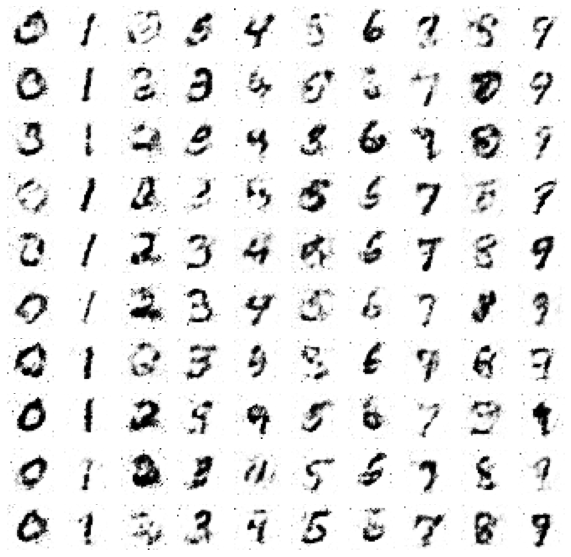

Epoch [86/200], Step [200/468], d_loss: 0.9362, g_loss: 1.3893, D(x): 0.56, D(G(z)): 0.38
Epoch [86/200], Step [400/468], d_loss: 0.9339, g_loss: 1.1725, D(x): 0.44, D(G(z)): 0.50
Epoch [87/200], Step [200/468], d_loss: 0.9212, g_loss: 0.9987, D(x): 0.40, D(G(z)): 0.52
Epoch [87/200], Step [400/468], d_loss: 1.0418, g_loss: 1.3787, D(x): 0.63, D(G(z)): 0.41
Epoch [88/200], Step [200/468], d_loss: 0.9754, g_loss: 1.3903, D(x): 0.54, D(G(z)): 0.44
Epoch [88/200], Step [400/468], d_loss: 0.9572, g_loss: 1.2619, D(x): 0.51, D(G(z)): 0.44
Epoch [89/200], Step [200/468], d_loss: 0.8727, g_loss: 1.3253, D(x): 0.45, D(G(z)): 0.43
Epoch [89/200], Step [400/468], d_loss: 1.0598, g_loss: 1.0614, D(x): 0.56, D(G(z)): 0.50
Epoch [90/200], Step [200/468], d_loss: 0.9054, g_loss: 1.4032, D(x): 0.50, D(G(z)): 0.40
Epoch [90/200], Step [400/468], d_loss: 0.9032, g_loss: 1.2945, D(x): 0.49, D(G(z)): 0.42


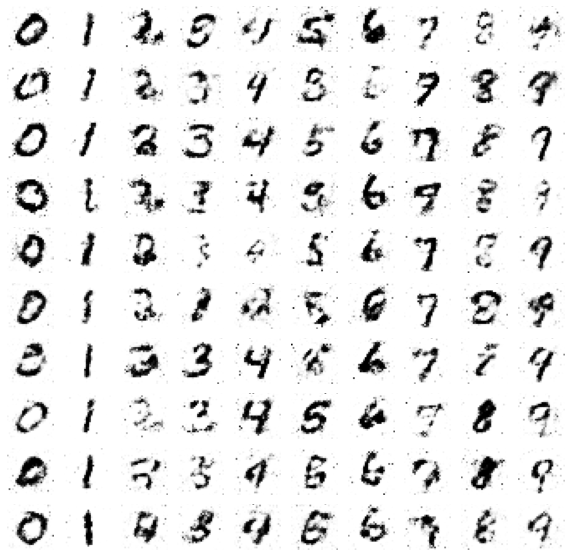

Epoch [91/200], Step [200/468], d_loss: 0.9331, g_loss: 1.1354, D(x): 0.40, D(G(z)): 0.53
Epoch [91/200], Step [400/468], d_loss: 1.0806, g_loss: 1.3525, D(x): 0.61, D(G(z)): 0.47
Epoch [92/200], Step [200/468], d_loss: 0.9203, g_loss: 1.3315, D(x): 0.51, D(G(z)): 0.41
Epoch [92/200], Step [400/468], d_loss: 0.9322, g_loss: 1.0962, D(x): 0.39, D(G(z)): 0.54
Epoch [93/200], Step [200/468], d_loss: 0.9971, g_loss: 1.2252, D(x): 0.50, D(G(z)): 0.49
Epoch [93/200], Step [400/468], d_loss: 1.0160, g_loss: 1.1996, D(x): 0.57, D(G(z)): 0.44
Epoch [94/200], Step [200/468], d_loss: 0.9108, g_loss: 1.1857, D(x): 0.41, D(G(z)): 0.50
Epoch [94/200], Step [400/468], d_loss: 0.9127, g_loss: 1.2578, D(x): 0.44, D(G(z)): 0.48
Epoch [95/200], Step [200/468], d_loss: 1.0297, g_loss: 1.1341, D(x): 0.50, D(G(z)): 0.53
Epoch [95/200], Step [400/468], d_loss: 0.9375, g_loss: 1.2721, D(x): 0.50, D(G(z)): 0.44


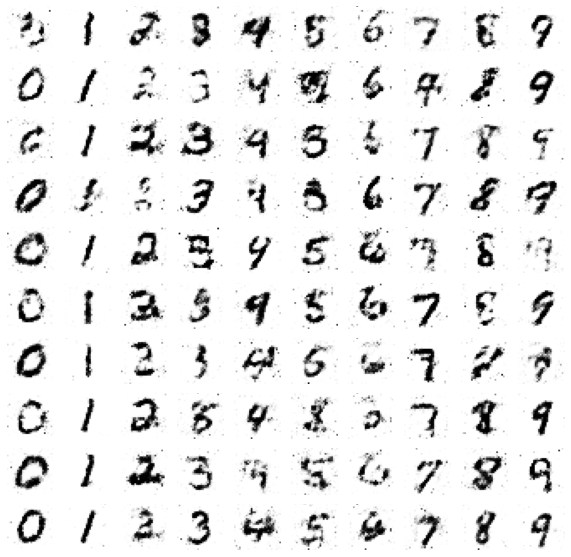

Epoch [96/200], Step [200/468], d_loss: 0.9498, g_loss: 1.4103, D(x): 0.54, D(G(z)): 0.41
Epoch [96/200], Step [400/468], d_loss: 1.0261, g_loss: 1.1871, D(x): 0.50, D(G(z)): 0.53
Epoch [97/200], Step [200/468], d_loss: 1.0154, g_loss: 1.3432, D(x): 0.60, D(G(z)): 0.42
Epoch [97/200], Step [400/468], d_loss: 0.8853, g_loss: 1.1933, D(x): 0.39, D(G(z)): 0.49
Epoch [98/200], Step [200/468], d_loss: 0.9217, g_loss: 1.1246, D(x): 0.41, D(G(z)): 0.51
Epoch [98/200], Step [400/468], d_loss: 0.8916, g_loss: 1.1930, D(x): 0.42, D(G(z)): 0.47
Epoch [99/200], Step [200/468], d_loss: 0.8884, g_loss: 1.2720, D(x): 0.43, D(G(z)): 0.46
Epoch [99/200], Step [400/468], d_loss: 0.9280, g_loss: 1.3179, D(x): 0.49, D(G(z)): 0.43
Epoch [100/200], Step [200/468], d_loss: 1.0050, g_loss: 1.2963, D(x): 0.56, D(G(z)): 0.45
Epoch [100/200], Step [400/468], d_loss: 0.9246, g_loss: 1.2988, D(x): 0.50, D(G(z)): 0.42


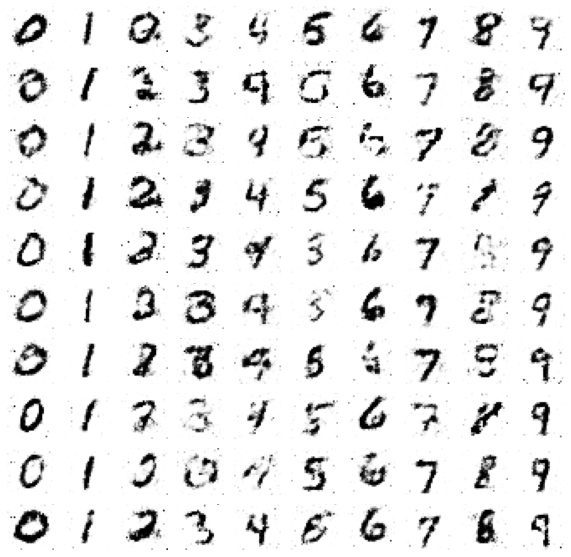

Epoch [101/200], Step [200/468], d_loss: 0.8764, g_loss: 1.3883, D(x): 0.39, D(G(z)): 0.48
Epoch [101/200], Step [400/468], d_loss: 0.8131, g_loss: 1.1905, D(x): 0.36, D(G(z)): 0.46
Epoch [102/200], Step [200/468], d_loss: 0.8777, g_loss: 1.2915, D(x): 0.41, D(G(z)): 0.47
Epoch [102/200], Step [400/468], d_loss: 0.9903, g_loss: 1.1844, D(x): 0.42, D(G(z)): 0.57
Epoch [103/200], Step [200/468], d_loss: 0.9950, g_loss: 1.4004, D(x): 0.55, D(G(z)): 0.45
Epoch [103/200], Step [400/468], d_loss: 0.9846, g_loss: 1.2840, D(x): 0.50, D(G(z)): 0.48
Epoch [104/200], Step [200/468], d_loss: 0.9115, g_loss: 1.2915, D(x): 0.43, D(G(z)): 0.48
Epoch [104/200], Step [400/468], d_loss: 0.9784, g_loss: 1.0990, D(x): 0.43, D(G(z)): 0.54
Epoch [105/200], Step [200/468], d_loss: 1.0521, g_loss: 1.2477, D(x): 0.50, D(G(z)): 0.55
Epoch [105/200], Step [400/468], d_loss: 0.8762, g_loss: 1.2955, D(x): 0.42, D(G(z)): 0.46


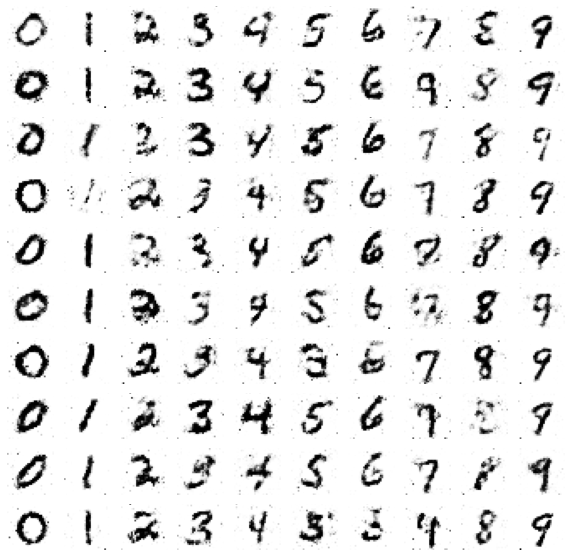

Epoch [106/200], Step [200/468], d_loss: 0.9581, g_loss: 1.2475, D(x): 0.47, D(G(z)): 0.49
Epoch [106/200], Step [400/468], d_loss: 0.9589, g_loss: 1.1765, D(x): 0.47, D(G(z)): 0.49
Epoch [107/200], Step [200/468], d_loss: 0.9448, g_loss: 1.3282, D(x): 0.48, D(G(z)): 0.46
Epoch [107/200], Step [400/468], d_loss: 1.0733, g_loss: 1.0990, D(x): 0.53, D(G(z)): 0.54
Epoch [108/200], Step [200/468], d_loss: 0.9750, g_loss: 1.4245, D(x): 0.52, D(G(z)): 0.45
Epoch [108/200], Step [400/468], d_loss: 0.8653, g_loss: 1.3696, D(x): 0.50, D(G(z)): 0.37
Epoch [109/200], Step [200/468], d_loss: 0.8418, g_loss: 1.4687, D(x): 0.45, D(G(z)): 0.39
Epoch [109/200], Step [400/468], d_loss: 1.0144, g_loss: 1.4131, D(x): 0.55, D(G(z)): 0.46
Epoch [110/200], Step [200/468], d_loss: 0.9712, g_loss: 1.1164, D(x): 0.48, D(G(z)): 0.49
Epoch [110/200], Step [400/468], d_loss: 0.8809, g_loss: 1.2249, D(x): 0.47, D(G(z)): 0.41


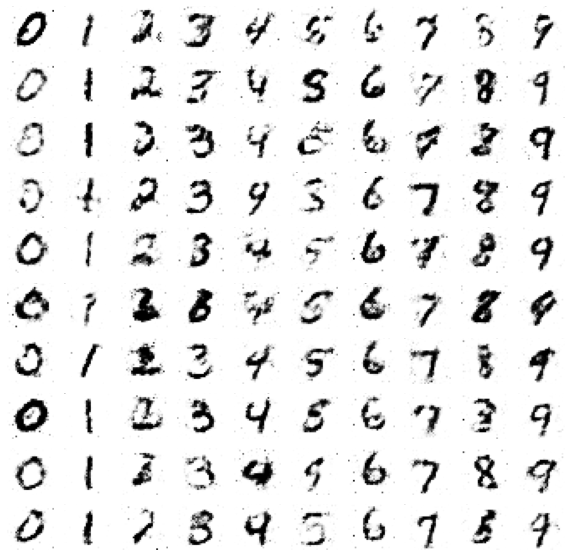

Epoch [111/200], Step [200/468], d_loss: 0.8915, g_loss: 1.2789, D(x): 0.47, D(G(z)): 0.42
Epoch [111/200], Step [400/468], d_loss: 0.9567, g_loss: 1.4606, D(x): 0.56, D(G(z)): 0.40


KeyboardInterrupt: ignored

In [18]:
from torch.optim import Adam, SGD
from torchvision.datasets import MNIST
from array2gif import write_gif
from torch.autograd import Variable
import os
import torchvision

try:
  data_path = os.path.join(os.path.abspath(os.environ["CONDA_PREFIX"]),
                          'datasets')
except KeyError:
    data_path = os.path.join(os.path.abspath(os.environ["HOME"]),
                         'datasets')
# We make sure that the dataset is actually available
try:
    torchvision.datasets.MNIST(root=data_path,
                               download=False)
except RuntimeError or KeyError:
    if not os.path.isdir(data_path):
            os.makedirs(data_path)
    torchvision.datasets.MNIST(root=data_path,
                               download=True)


dataset = torchvision.datasets.MNIST(root=data_path,download=True)
dataset.transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                                    torchvision.transforms.Normalize(mean = (0.5,), 
                                                                                     std = (0.5,))])

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find("Linear") != -1:
        torch.nn.init.kaiming_uniform_(m.weight.data)

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')
print("Device is: " + str(device))

# Data Loader
batch_size = 128
data_loader = torch.utils.data.DataLoader(dataset=dataset,
                                          batch_size=batch_size,
                                          shuffle=True, drop_last=True)
generator     = Generator().to(device).apply(weights_init)
discriminator = Discriminator().to(device).apply(weights_init)

criterion = nn.BCELoss()

optim_d = Adam(discriminator.parameters(), lr=0.00001)
optim_g = Adam(generator.parameters(), lr=0.00002)
gif_array = []*EPOCH_SIZE
total_step = len(data_loader)
for epoch in range(EPOCH_SIZE):
  for step, (imgs, labels) in enumerate(data_loader):

    # Ground truths
    if epoch < 100:
      real_truth = torch.normal(0.9 + (epoch/1000), 0.1001 - (epoch/1000), size = (batch_size, 1)).to(device)
      fake_truth = torch.normal(0.1 - + (epoch/1000), 0.10001 - (epoch/1000), size = (batch_size, 1)).to(device)
    else:
      real_truth = torch.ones(batch_size, 1).to(device)
      fake_truth = torch.zeros(batch_size, 1).to(device)
    # Labels
    real_labels = Variable(labels).to(device)
    real_imgs   = Variable(imgs).to(device)

    # Create latent space and labels
    lat_space = torch.normal(0, 1, size=(batch_size, LATENT_SIZE)).to(device)
    lat_labels = torch.randint(low = 0, high = NUM_CLASSES, size = (batch_size,)).to(device)
    gnrt_imgs = generator(lat_space, lat_labels)

    # ================================================================== #
    #                        Train the generator                         #
    # ================================================================== #
    
    # Compute loss with fake images
    f_outputs = discriminator(gnrt_imgs, lat_labels)
    g_loss = criterion(f_outputs, real_truth)

    # Backprop and optimize
    optim_d.zero_grad()
    optim_g.zero_grad()
    g_loss.backward(retain_graph=True)
    optim_g.step()

    # ================================================================== #
    #                      Train the discriminator                       #
    # ================================================================== #
    gnrt_imgs = generator(lat_space, lat_labels)
    # Real Images
    r_outputs     = discriminator(real_imgs, real_labels)
    d_loss_real = criterion(r_outputs, real_truth)

    # BCE on fake images
    outputs = discriminator(gnrt_imgs, lat_labels)
    d_loss_fake = criterion(outputs, fake_truth)

    # Backprop and optimize
    d_loss = d_loss_real + d_loss_fake
    optim_d.zero_grad()
    optim_g.zero_grad()
    d_loss.backward()
    optim_d.step()

    if (step+1) % 200 == 0:
        print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                .format(epoch, EPOCH_SIZE, 
                        step+1, total_step, 
                        d_loss.item(), 
                        g_loss.item(), 
                        d_loss_real.mean().item(), 
                        d_loss_fake.mean().item()))
  # Generate sample images
  lat_space = torch.randn(NUM_CLASSES**2, LATENT_SIZE).cuda()
  lat_labels = Variable(torch.IntTensor([lab for i in range(NUM_CLASSES) for lab in range(NUM_CLASSES)])).cuda()
  sample_images = generator(lat_space, lat_labels)
  # Plot
  if epoch%5 == 0:
    plot_epoch(sample_images.cpu())
  array_2_make_grid = ((sample_images.cpu()[0:ROW_NUM**2, :, :, :] + 1) * (1/2) * 255).type(torch.uint8)
  gif_array.append(torchvision.utils.make_grid(array_2_make_grid, nrow = ROW_NUM).numpy())
write_gif(gif_array, filename = 'cgan_25_fps.gif', fps = 25)

In [20]:
write_gif(gif_array, filename = 'cgan_10_fps.gif', fps = 10)